In [1]:
import numpy as np 
import torch 
import torch.nn as nn
import gym 
import random
import matplotlib.pyplot as plt
from torch.autograd import Variable

from Visualisation import render_averages_plot, render_plot_with_hist
from SingleReplay import DQN

In [2]:
class ER(DQN):

    def replay(self, memory, size, gamma):
        if len(memory) >= size:
            states = []
            targets = []

            batch = random.sample(memory, size)

            for experience in batch:
                state, action, next_state, reward, done = experience
                states.append(state)
                q_vals = self.predict(state).tolist()
                if done:
                    q_vals[action] = reward
                else: 
                    q_vals_next = self.predict(next_state)
                    q_vals[action] = reward + gamma * torch.max(q_vals_next).item()
                targets.append(q_vals)
            self.update(states, targets)

In [20]:

def train(env, model, episodes, gamma, epsilon, decay, mem_size):
    final_reward = []
    memory = epsilons = []
    
    goal_achieved = 0
    episode_num = 0

    for _ in range(episodes):
        episode_num += 1

        state = env.reset()
        done = False
        total = 0

        while not done:
            # should this be converted to a list? 
            q_values = model.predict(state)
            # print(q_values)

            if np.random.random() < epsilon:
                action = env.action_space.sample()
            else:
                action = torch.argmax(q_values).item()

            next_state, reward, done, _ = env.step(action)
            # print(next_state[2])
            # if -0.05 < next_state[2] < 0.05:
            #     if -0.5 < next_state[0] < 0.5:
            #         reward *= 1.2
            #     else:
            #         reward *= 1.1
                
            # env.render()
            total += reward

                # break
            memory.append((state, action, next_state, reward, done))
            # if 25 is a list, this doesnt need to be computed again
            model.predict(state).tolist()
            model.replay(memory, mem_size, gamma)
            state = next_state

        epsilon = max(epsilon * decay, 0.01)
        epsilons.append(epsilon)
        final_reward.append(total)
        if total >= 200:
            goal_achieved += 1
        
        

        print("Episode number:", episode_num, "Reward:", total)
    # print(goal_achieved)
    return final_reward, goal_achieved, epsilons

In [4]:
def average(runs, env, episodes):
    all_rewards = []
    successes = []

    for _ in range(runs):
        model = ER(obs_dim, action_dim, lr)
        rewards, goals = train(env, model, episodes, gamma, epsilon, decay, 10)
        all_rewards.append(rewards)
        successes.append(goals)

    
    rewards_array = np.array([np.array(i) for i in all_rewards])
    return rewards_array, successes

In [ ]:
episodes = 150
lr = 0.001

gamma = 0.9
epsilon = 0.3
decay = 0.99
UPDATE = 10



In [15]:
env = gym.make("CartPole-v1")
obs_dim = env.observation_space.shape[0]
action_dim = env.action_space.n

model = ER(obs_dim, action_dim, lr)

In [13]:

           
rewards, goals = train(env, model, episodes, gamma, epsilon, decay, 10)

%store rewards
%store goals


/home/dylan/Documents/MSc/Dissertation/CartPole/SingleReplay.py:30: UserWarning: Creating a tensor from a list of numpy.ndarrays is extremely slow. Please consider converting the list to a single numpy.ndarray with numpy.array() before converting to a tensor. (Triggered internally at  ../torch/csrc/utils/tensor_new.cpp:210.)
  y_pred = self.nn(torch.Tensor(state))


Episode number: 1 Reward: 10.0
Episode number: 2 Reward: 12.0
Episode number: 3 Reward: 9.0
Episode number: 4 Reward: 11.0
Episode number: 5 Reward: 9.0
Episode number: 6 Reward: 15.0
Episode number: 7 Reward: 10.0
Episode number: 8 Reward: 9.0
Episode number: 9 Reward: 12.0
Episode number: 10 Reward: 9.0
Episode number: 11 Reward: 14.0
Episode number: 12 Reward: 10.0
Episode number: 13 Reward: 12.0
Episode number: 14 Reward: 11.0
Episode number: 15 Reward: 60.0
Episode number: 16 Reward: 9.0
Episode number: 17 Reward: 14.0
Episode number: 18 Reward: 10.0
Episode number: 19 Reward: 10.0
Episode number: 20 Reward: 11.0
Episode number: 21 Reward: 13.0
Episode number: 22 Reward: 15.0
Episode number: 23 Reward: 34.0
Episode number: 24 Reward: 70.0
Episode number: 25 Reward: 35.0
Episode number: 26 Reward: 26.0
Episode number: 27 Reward: 17.0
Episode number: 28 Reward: 20.0
Episode number: 29 Reward: 27.0
Episode number: 30 Reward: 38.0
Episode number: 31 Reward: 12.0
Episode number: 32 Rew

KeyboardInterrupt: 

In [8]:
%store -r rewards
%store -r goals

In [9]:
print(goals)

72


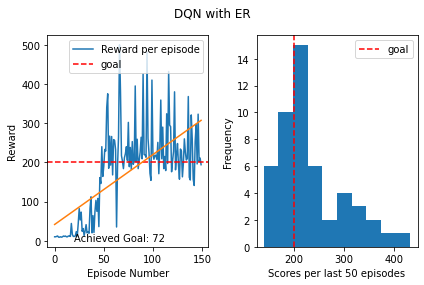

In [10]:
render_plot_with_hist(range(episodes), rewards, goals, "DQN with ER", True, "ERHist")

In [27]:
rewards_runs, goals_runs = average(10, env, episodes)

%store rewards_runs
%store goals_runs

Episode number: 1 Reward: 12.0
Episode number: 2 Reward: 10.0
Episode number: 3 Reward: 10.0
Episode number: 4 Reward: 19.0
Episode number: 5 Reward: 16.0
Episode number: 6 Reward: 15.0
Episode number: 7 Reward: 13.0
Episode number: 8 Reward: 9.0
Episode number: 9 Reward: 9.0
Episode number: 10 Reward: 9.0
Episode number: 11 Reward: 11.0
Episode number: 12 Reward: 15.0
Episode number: 13 Reward: 10.0
Episode number: 14 Reward: 56.0
Episode number: 15 Reward: 35.0
Episode number: 16 Reward: 34.0
Episode number: 17 Reward: 26.0
Episode number: 18 Reward: 21.0
Episode number: 19 Reward: 45.0
Episode number: 20 Reward: 46.0
Episode number: 21 Reward: 79.0
Episode number: 22 Reward: 178.0
Episode number: 23 Reward: 85.0
Episode number: 24 Reward: 99.0
Episode number: 25 Reward: 67.0
Episode number: 26 Reward: 79.0
Episode number: 27 Reward: 123.0
Episode number: 28 Reward: 68.0
Episode number: 29 Reward: 95.0
Episode number: 30 Reward: 74.0
Episode number: 31 Reward: 120.0
Episode number: 3

KeyboardInterrupt: 

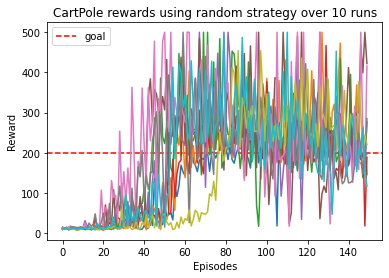

In [16]:
render_averages_plot(range(episodes), rewards_runs, "DQN with No ER over 10 Runs", "SR10")

In [6]:
%store -r rewards_runs
%store -r goals_runs
print(np.mean(goals_runs))

73.5


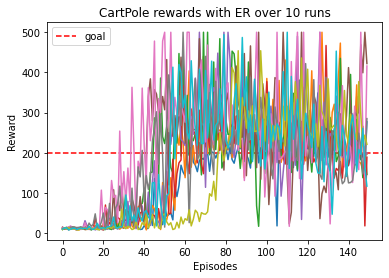

In [7]:
render_averages_plot(range(episodes), rewards_runs, "DQN with No ER over 10 Runs", "ER10")

In [22]:
acheiveds = {}
for epsilon in [0.3, 0.4, 0.5, 0.6, 0.7]:
    print(epsilon)
    model = ER(obs_dim, action_dim, lr)
    _, achieved, epsilons = train(env, model, episodes, gamma, epsilon, decay, 10)
    
    # acheiveds[epsilon] = (achieved, epsilons)
%store acheiveds
print(acheiveds)


    

0.3
Episode number: 1 Reward: 35.0


TypeError: cannot unpack non-iterable float object